In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

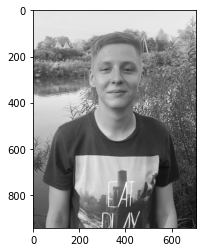

In [ ]:
img = cv2.imread('./roman.jpg') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [ ]:
gray.shape

(943, 707)

In [ ]:
sharpening = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
blur = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])/9
emboss = np.array([
    [1, 0, 0],
    [0, 0, 0],
    [0, 0, -1]
])

In [ ]:
def try_get_pixel(image, coords, padding_value, coef):
  imshape = image.shape
  if 0 <= coords[0] < imshape[0] and 0 <= coords[1] < imshape[1]:
    return image[coords[0]][coords[1]]*coef
  return padding_value*coef

In [ ]:
def apply_kernel(img, kernel, padding_value):
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      nearby_pixel_values = [try_get_pixel(img, (x, y), padding_value, kernel[x-i][y-j]) for x in [i-1, i, i+1] for y in [j-1, j, j+1]]
      final_pixel_value = 0
      for coef in nearby_pixel_values:
        final_pixel_value += coef
      if final_pixel_value > 255:
        final_pixel_value = 255
      if final_pixel_value < 0:
        final_pixel_value = 0
      img[i][j] = final_pixel_value
  return img

In [ ]:
im1 = apply_kernel(gray.copy(), sharpening, 0)
im2 = apply_kernel(gray.copy(), blur, 0)
im3 = apply_kernel(gray.copy(), emboss, 0)

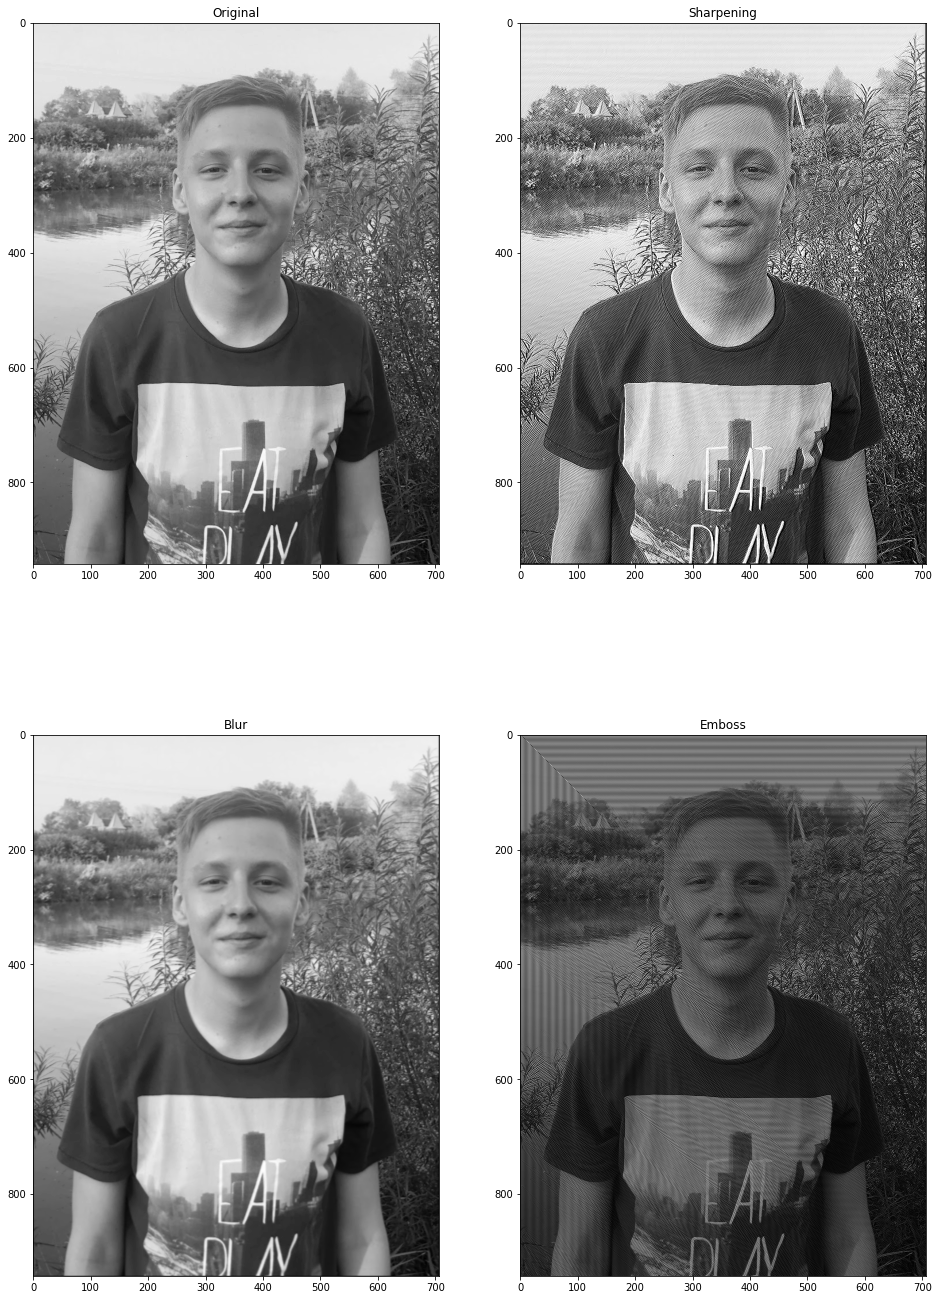

In [ ]:
figure, axis = plt.subplots(2, 2, figsize=(16, 24))

axis[0, 0].imshow(gray, cmap='gray')
axis[0, 0].set_title("Original")

axis[0, 1].imshow(im1, cmap='gray')
axis[0, 1].set_title("Sharpening")

axis[1, 0].imshow(im2, cmap='gray')
axis[1, 0].set_title("Blur")

axis[1, 1].imshow(im3, cmap='gray')
axis[1, 1].set_title("Emboss")

plt.show()